### Scrape tweets by key word searching `Mangkhut`('山竹')

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from getpass import getpass
import lxml
from bs4 import BeautifulSoup as bs
import time

In [2]:
def init_driver():
 
     # initiate the driver:
     driver = webdriver.Chrome()
 
     # set a default wait time for the browser [5 seconds here]:
     driver.wait = WebDriverWait(driver, 5)
 
     return driver

In [3]:
def login_twitter(driver, username, password):
 
    # open the web page in the browser:
    driver.get("https://twitter.com/login")
 
    # find the boxes for username and password
    username_field = driver.find_element_by_class_name("js-username-field")
    password_field = driver.find_element_by_class_name("js-password-field")
 
    # enter your username:
    username_field.send_keys(username)
    driver.implicitly_wait(1)
 
    # enter your password:
    password_field.send_keys(password)
    driver.implicitly_wait(1)
 
    # click the "Log In" button:
    driver.find_element_by_class_name("EdgeButtom--medium").click()
 
    return

In [4]:
def search_twitter(driver, query):
 
    # wait until the search box has loaded:
    box = driver.wait.until(EC.presence_of_element_located((By.NAME, "q")))
     
    driver.maximize_window()
    
    # find the search box in the html:
    driver.find_element_by_name("q").clear()
 
    # enter your search string in the search box:
    box.send_keys(query)
 
    # submit the query (like hitting return):
    box.submit()
 
    # initial wait for the search results to load
    wait = WebDriverWait(driver, 10)
    
    # Scroll N times
    for i in range(40):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(10)
 
    # wait until the first search result is found. Search results will be tweets, which are html list items and have the class='data-item-id':
    wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "li[data-item-id]")))

    
    # extract the html for the whole lot:
    page_source = driver.page_source
    driver.close()
    return page_source

In [6]:
def extract_tweets(page_source):
 
    soup = bs(page_source,'lxml')
 
    tweets = []
    for li in soup.find_all("li", class_='js-stream-item'):
 
        # If our li doesn't have a tweet-id, we skip it as it's not going to be a tweet.
        if 'data-item-id' not in li.attrs:
            continue
 
        else:
            tweet = {
                'tweet_id': li['data-item-id'],
                'text': None,
                'user_id': None,
                'user_screen_name': None,
                'user_name': None,
                'created_at': None,
                'retweets': 0,
                'likes': 0,
                'replies': 0
            }
 
            # Tweet Text
            text_p = li.find("p", class_="tweet-text")
            if text_p is not None:
                tweet['text'] = text_p.get_text()
 
            # Tweet User ID, User Screen Name, User Name
            user_details_div = li.find("div", class_="tweet")
            if user_details_div is not None:
                tweet['user_id'] = user_details_div['data-user-id']
                tweet['user_screen_name'] = user_details_div['data-screen-name']
                tweet['user_name'] = user_details_div['data-name']
 
            # Tweet date
            date_span = li.find("span", class_="_timestamp")
            if date_span is not None:
                tweet['created_at'] = float(date_span['data-time-ms'])
 
            # Tweet Retweets
            retweet_span = li.select("span.ProfileTweet-action--retweet > span.ProfileTweet-actionCount")
            if retweet_span is not None and len(retweet_span) > 0:
                tweet['retweets'] = int(retweet_span[0]['data-tweet-stat-count'])
 
            # Tweet Likes
            like_span = li.select("span.ProfileTweet-action--favorite > span.ProfileTweet-actionCount")
            if like_span is not None and len(like_span) > 0:
                tweet['likes'] = int(like_span[0]['data-tweet-stat-count'])
 
            # Tweet Replies
            reply_span = li.select("span.ProfileTweet-action--reply > span.ProfileTweet-actionCount")
            if reply_span is not None and len(reply_span) > 0:
                tweet['replies'] = int(reply_span[0]['data-tweet-stat-count'])
 
            tweets.append(tweet)
 
    return tweets

In [7]:
if __name__ == "__main__":
 
    # start a driver for a web browser:
    driver = init_driver()
 
    # log in to twitter (replace username/password with your own):
    username = input("user name : ")
    password = getpass("password  : ")
    login_twitter(driver, username, password)
 
    # search twitter:
    query = "Mangkhut"
    page_source = search_twitter(driver, query)

    # extract info from the search results:
    tweets = extract_tweets(page_source)


user name : Nandobreaux
password  : ········


In [8]:
len(tweets)

453

In [9]:
import pandas as pd
df = pd.DataFrame(tweets)

In [10]:
df

,created_at,likes,replies,retweets,text,tweet_id,user_id,user_name,user_screen_name
0,1.537195e+12,0,0,0,"This weekend, Phillippines was hit with the mo...",1041697691103907840,773967778755772417,erica wilk,ericawilkSU
1,1.537169e+12,0,1,0,#MANGKHUT (1822) became #TROPICAL_DEPRESSION\n...,1041588791738159110,199549606,よっしみ～☆🌏,yoshimy_s
2,1.537167e+12,0,0,0,"""Typhoon Mangkhut Slams Hong Kong and Southern...",1041578086976897024,2395826915,Marcus Monroe,MarcusTec
3,1.537185e+12,0,0,0,Typhoon Mangkhut: Storm’s path of destruction ...,1041654497393692672,1931957833,Rosena Falconi,RosenaFalconi
4,1.537169e+12,5,1,2,After Mangkhut striked my hometown ytd & my fl...,1041588986983067648,4191109819,🈂Saya🙏🏻,hellosaya34
5,1.537185e+12,72,11,50,Video captures frightening moment chunk of bui...,1041654667552403457,28785486,ABC News,ABC
6,1.537166e+12,13,0,7,#OmpongPH aftermath: damaged buildings and deb...,1041574409696239616,79938654,UNICEF Philippines,unicefphils
7,1.537190e+12,0,0,1,Typhoon Mangkhut: More Than 40 Bodies Found in...,1041678354708144128,1015303630931578880,Top News Today,topnewstodayx
8,1.537170e+12,3,0,1,In #HongKong after typhoon #Mangkhut pic.twitt...,1041591429401858049,1010833777994620928,solidblock.vc,Solidblock2
9,1.537176e+12,0,0,0,Typhoon Mangkhut leaves death and destruction ...,1041618555693756416,2853324261,VIPortal INC,VIPortalINC


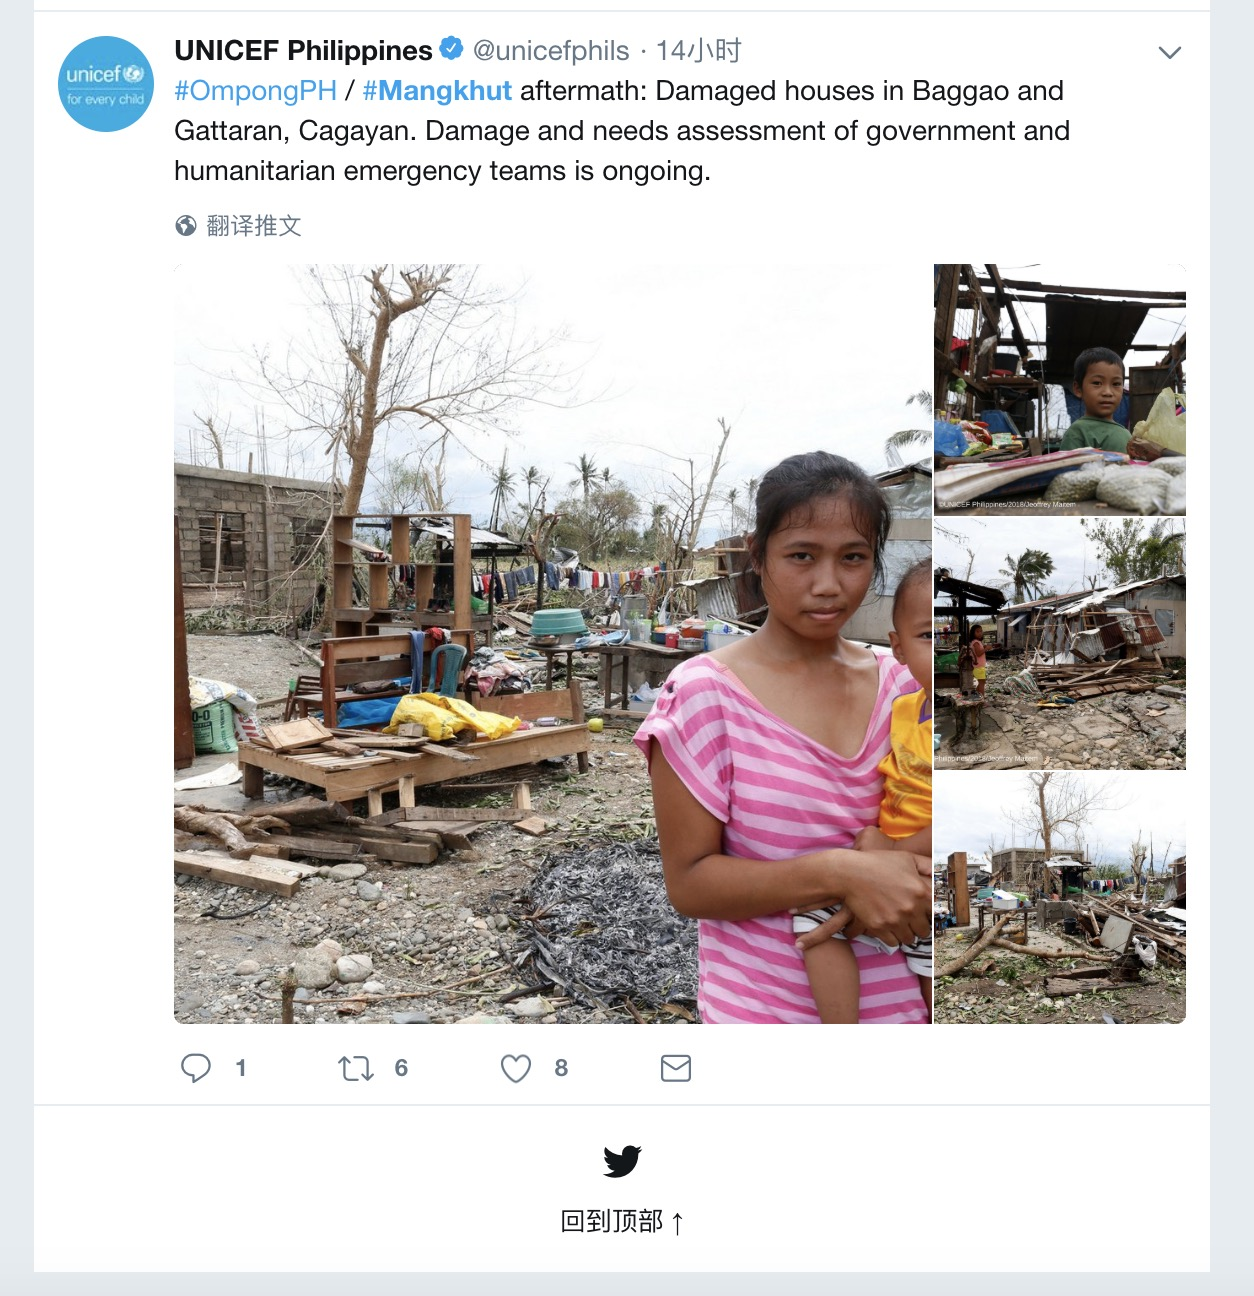

In [25]:
from IPython.display import Image
Image(filename="cannot_be_infinitely_scrolled.png")
#to some point, it cannot be scrolled anymore, and show a back to top button